In [1]:
import numpy as np
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [2]:
# create some data
mean_01 = np.array([0., 0.])
cov_01 = np.array([[1.0, 1.2], [1.2, 1.5]])

data = np.random.multivariate_normal(mean_01, cov_01, 800)
print data.shape
# print np.cov(data.T)

(800, 2)


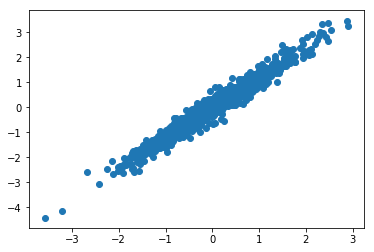

In [3]:
plt.figure(0)
plt.scatter(data[:, 0], data[:, 1])
plt.show()

In [4]:
def pca(X, k=None):
    # set number of output dims
    if k is None:
        k = X.shape[1]
    
    # compute the covariance
    A = np.cov(X.T)
    
    # Compute the eigenvectors and eigenvalues
    eig_val, eig_vec = np.linalg.eig(A)
    #Z = X.dot(W)
    return eig_val, eig_vec

In [5]:
lam, W = pca(data)
print lam.shape, W.shape

(2,) (2, 2)


In [6]:
print lam
print W

[0.02380731 2.29838046]
[[-0.77707035 -0.62941375]
 [ 0.62941375 -0.77707035]]


In [7]:
print np.cov(data.T)

[[0.924906   1.11249091]
 [1.11249091 1.39728177]]


In [8]:

print W[0][0]
print W

-0.7770703531292871
[[-0.77707035 -0.62941375]
 [ 0.62941375 -0.77707035]]


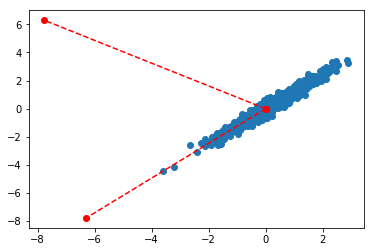

In [10]:
plt.figure(0)
plt.scatter(data[:, 0], data[:, 1])
plt.plot([0, 10*W[0][0]], [0, 10*W[1][0]], 'ro--')  
plt.plot([0, 10*W[0][1]], [0, 10*W[1][1]], 'ro--')
plt.show()

In [11]:
Z = data.dot(W)
print Z.shape
print Z[:10]

(800, 2)
[[ 0.0360077  -1.24794997]
 [-0.01014777  3.07832936]
 [ 0.1351816   2.15360041]
 [-0.13648755  0.36552216]
 [ 0.04445552  0.42254054]
 [-0.15849079 -1.27192946]
 [-0.14519559  0.99638268]
 [ 0.04523033 -0.24787736]
 [-0.01691417 -2.24562768]
 [ 0.21920131 -0.19165762]]


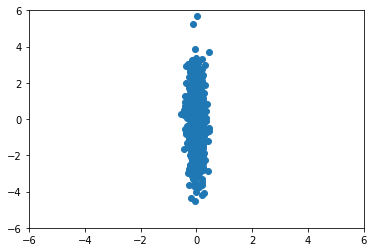

In [12]:
plt.figure(0)
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.scatter(Z[:, 0], Z[:, 1])
plt.show()

In [13]:
sigma = np.cov(Z.T)
print W.dot(sigma).dot(W.T)

[[0.924906   1.11249091]
 [1.11249091 1.39728177]]


(800, 2)


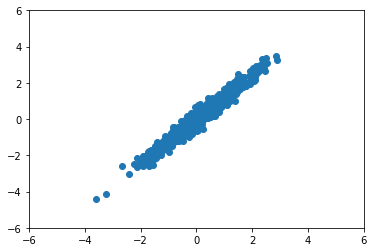

In [17]:
# Reconstructing the original data
D = Z.dot(W.T)
print D.shape

plt.figure(0)
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.scatter(D[:, 0], D[:, 1])
plt.show()

In [27]:
print np.cumsum(lam[::-1]/lam.sum())

[0.99014617 1.        ]


# PCA on MNIST

In [32]:
X = pd.read_csv('MNIST_dataset/train_images_mnist.csv')
y = pd.read_csv('MNIST_dataset/train_labels_mnist.csv')

In [38]:
X_train = X.values
y_train = y.values
print X_train.shape

(59999, 784)


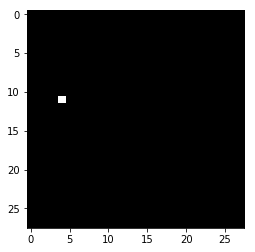

In [45]:
N = 1200
plt.grid("off")
plt.imshow(X_train[19990].astype(np.uint8).reshape((28, 28)), cmap='gray')

In [58]:
A = np.cov(X_train.T)
print A.shape

(784, 784)


In [59]:
eig_vals, eig_vecs = np.linalg.eig(A)
print eig_vals.shape

(784,)


In [60]:
info = []
for ix in range(eig_vals.shape[0]):
    dx = [eig_vals[ix], eig_vecs[:, ix]]
    info.append(dx)
print len(info)

784


In [61]:
info = sorted(info, key=lambda z: z[0], reverse=True)

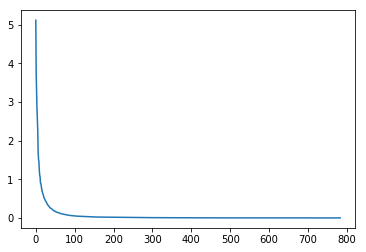

In [63]:
plt.plot(sorted_lambda)

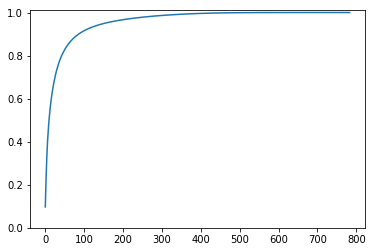

In [64]:
plt.figure(0)
plt.ylim(0, 1.01)
plt.plot(np.cumsum(sorted_lambda/sorted_lambda.sum()))
plt.show()

In [65]:
explained_variances_ratio = np.cumsum(sorted_lambda/sorted_lambda.sum())
print explained_variances_ratio[50]

(0.8278382621722974+0j)


In [66]:
for ix in range(explained_variances_ratio.shape[0]):
    if explained_variances_ratio[ix] < 0.99:
        pass
    else:
        print ix
        break

330


In [67]:
k = 500
W = sorted_W[:, :k]
Z = X_train.dot(W)
print Z.shape

(59999, 500)


(59999, 784)


/home/keshavpc/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


ValueError: cannot reshape array of size 783 into shape (28,28)

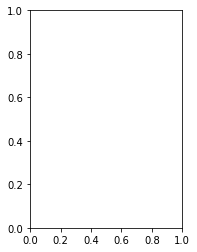

In [68]:
X_reconstruct = Z.dot(W.T).astype(np.uint8)
X_pos = (X_reconstruct>0)
X_new = X_reconstruct * X_pos

print X_reconstruct.shape

# print np.asarray(X_reconstruct[0], dtype='uint8')
N = 1

plt.subplot(1, 2, 1)
plt.grid("off")
plt.imshow(data[N].astype(np.uint8).reshape((28, 28)), cmap='gray')
plt.subplot(1, 2, 2)
plt.grid("off")
plt.imshow(X_new[N].astype(np.uint8).reshape((28, 28)), cmap='gray')

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

X_ = pca.fit_transform(data)
print X_.shape

In [ ]:
X_re = pca.inverse_transform(X_)
X_re.shape

In [ ]:
N = np.random.randint(0, high=10000)
plt.subplot(1, 2, 1)
plt.grid("off")
plt.imshow(data[N].reshape((28, 28)), cmap='gray')

plt.subplot(1, 2, 2)
plt.grid("off")

im = X_re[N]
img = im - im.min()
print img.max()
img = img

plt.imshow(im.astype(np.uint8).reshape((28, 28)), cmap='gray')

plt.show()

In [ ]:
X_re.shape

In [ ]:
colors = ['red', 'green', 'blue', 'black', 'pink', 'yellow', 'cyan', 'magenta', 'violet', 'brown', 'orange']
plt.figure(0)
for ix in range(2000):
    plt.scatter(X_[ix, 0], X_[ix, 1], color=colors[y[ix]])
plt.show()